# Data Import

In [199]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
!pip install klib
import klib
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.api as sm
import statsmodels.tools.tools as stattools
from tabulate import tabulate
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools
import sklearn.metrics as metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [200]:
#I have been manually dragging the test and train files to the root folder each time i login
#This codes replces that task. -joel
#from google.colab import files
#uploaded = files.upload()

In [201]:
#change color palette for graphs 
plt.style.use('seaborn-colorblind')

In [202]:
#read in dataset as 'titanic'
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [203]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [204]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [205]:
#show number of records and attributes
titanic.shape

(891, 12)

In [206]:
#show null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There is a significant number of null values for age (20%) and cabin (77%). 

In [207]:
#show counts for Survived
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Cabin

Cabin will be deleted as an attribute due to the high volume of null values. 

In [208]:
#Drop Cabin as a column 
titanic.drop('Cabin', axis=1, inplace=True)
#titanic.drop('Ticket', axis=1, inplace=True)

#Partition the Dataset

We want to split the dataset so that 67% of records are in the training set and 33% are in test set.



In [209]:
train, test = train_test_split(titanic, test_size=0.33, random_state=7)

#confirm that dataset has been partitioned correctly
print(titanic.shape)
print(train.shape)
print(test.shape)

(891, 11)
(596, 11)
(295, 11)


The dataset has now been partitioned into a training set ('train') and test set ('test'). Train has 596 (67%) records and test has 295 (33%) records. 

In [210]:
#show number of records that survived (Survived=1) or did not survive (Survive=0)
train['Survived'].value_counts()

0    373
1    223
Name: Survived, dtype: int64

Currently, the training set is imbalanced, with a higher proportion of those that did not survive (Class=0). We will resample the training set so that the proportion of each class is 50/50 to avoid class imbalances during the modeling phase. To find the number of records with Survived=1 we need to resample to have a 50% Survived rate, we use the following equation: 

> x = [p(records)-rare]/(1-p), where p=0.50, records=596, rare=223.


We get x=150, so we need to resample 150 records to obtain a Survived rate of 50%. 

In [211]:
#resampling of training data set
to_resample=train.loc[train['Survived'] == 1] #isolate all records of Survived=1
our_resample=to_resample.sample(n=150, replace=True) #sample w/ replacement
train_rebal=pd.concat([train, our_resample]) #combine original training set w/ resampled records
train_rebal['Survived'].value_counts()


1    373
0    373
Name: Survived, dtype: int64

In [212]:
print(titanic.shape)
print(train_rebal.shape)
print(test.shape)

(891, 11)
(746, 11)
(295, 11)


The training set now has 746 records, and the test set has 295 records. 

In [213]:
train_rebal.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            146
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

# Data transformation

### Age: Missing Values Imputation


Age variable has missing values and has a positively skewed distribution. With this, the missing data was imputed with the median of the age population.

GridSpec(6, 6)

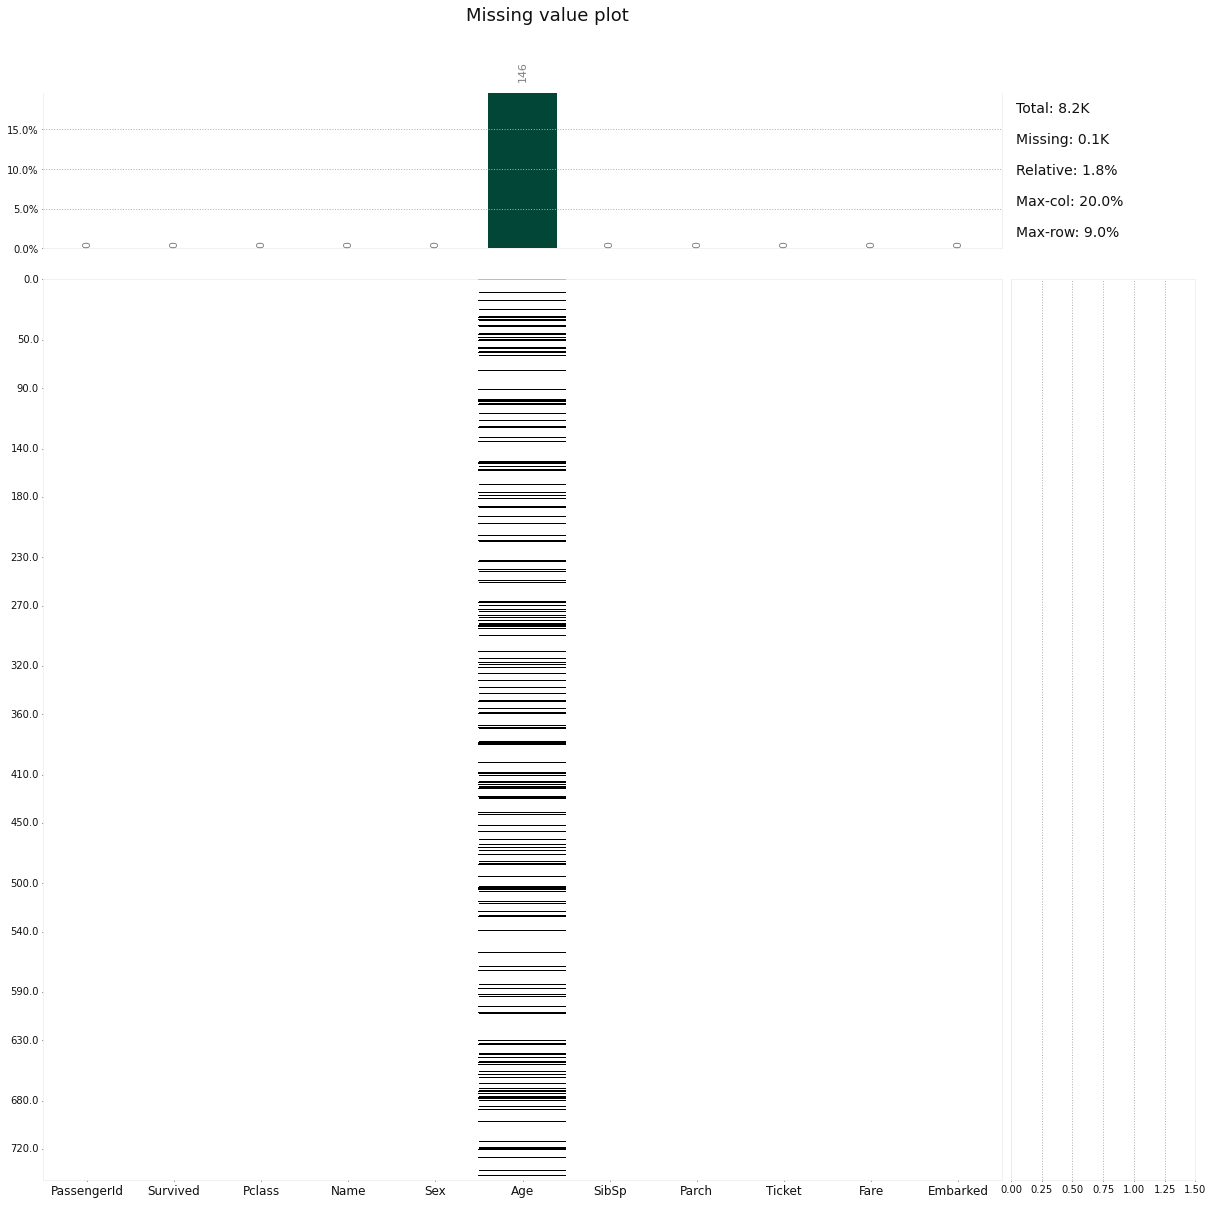

In [214]:
klib.missingval_plot(train_rebal)

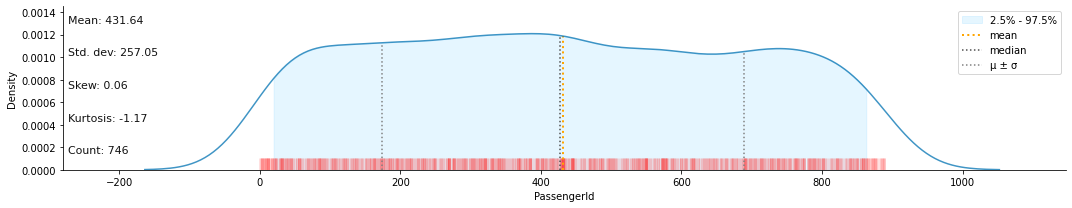

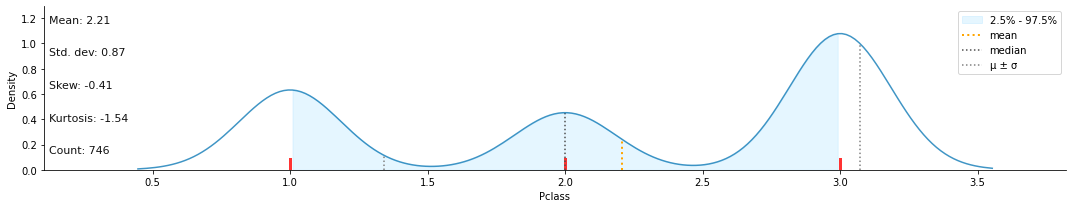

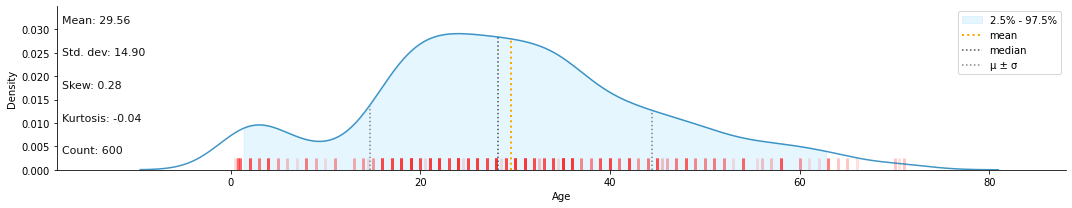

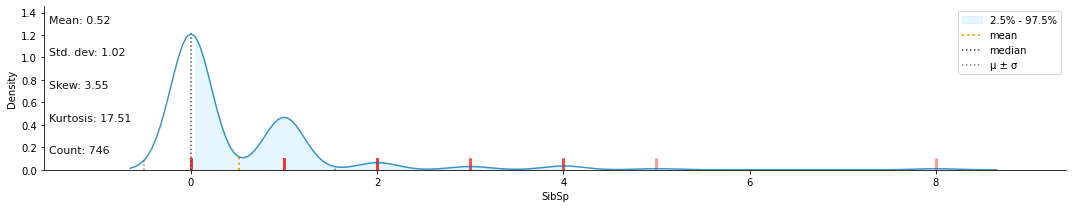

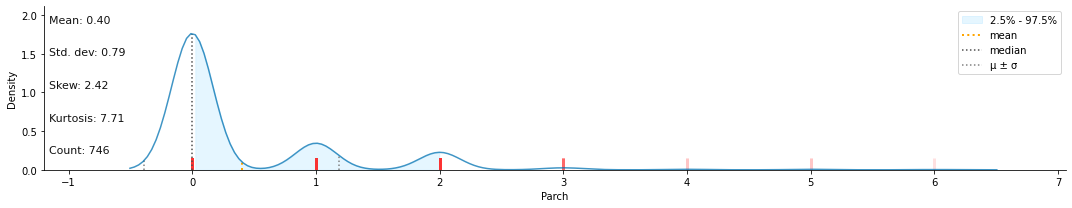

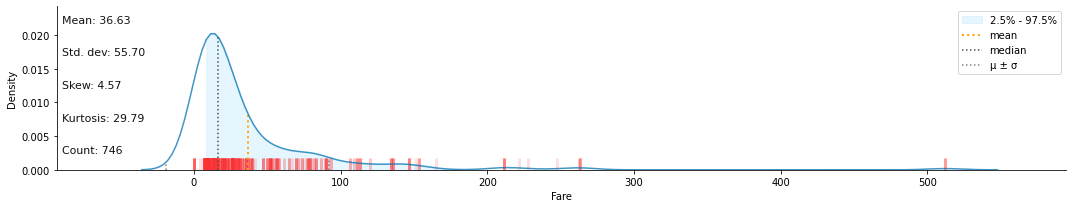

In [215]:
klib.dist_plot(train_rebal)

In [216]:
train_rebal.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,746.000000,746.000000,746.000000,600.000000,746.000000,746.000000,746.000000
mean,431.640751,0.500000,2.206434,29.556667,0.518767,0.399464,36.630791
std,257.054554,0.500335,0.865606,14.900709,1.024687,0.788304,55.696840
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,211.250000,0.000000,1.000000,20.000000,0.000000,0.000000,7.956250
50%,427.000000,0.500000,2.000000,28.250000,0.000000,0.000000,16.100000
75%,654.000000,1.000000,3.000000,39.000000,1.000000,1.000000,36.940650
max,888.000000,1.000000,3.000000,71.000000,8.000000,6.000000,512.329200


In [217]:
train_rebal['Age']= train_rebal['Age'].fillna(train_rebal['Age'].median())
train_rebal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 65 to 383
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  746 non-null    int64  
 1   Survived     746 non-null    int64  
 2   Pclass       746 non-null    int64  
 3   Name         746 non-null    object 
 4   Sex          746 non-null    object 
 5   Age          746 non-null    float64
 6   SibSp        746 non-null    int64  
 7   Parch        746 non-null    int64  
 8   Ticket       746 non-null    object 
 9   Fare         746 non-null    float64
 10  Embarked     746 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 69.9+ KB


In [218]:
test['Age']= test['Age'].fillna(test['Age'].median())
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 725 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Survived     295 non-null    int64  
 2   Pclass       295 non-null    int64  
 3   Name         295 non-null    object 
 4   Sex          295 non-null    object 
 5   Age          295 non-null    float64
 6   SibSp        295 non-null    int64  
 7   Parch        295 non-null    int64  
 8   Ticket       295 non-null    object 
 9   Fare         295 non-null    float64
 10  Embarked     293 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 27.7+ KB


### Age: Transform to categorical

Convert Age variable to categorical as follows: 


*   'Baby/Toddler' :- 0 to 3 years
*   'Child' :- 4 to 17 years
*   'Adult' :- 18 to 63 years
*   'Elderly' :- 64 to 99 years

In [219]:
train_rebal['Age_c'] = pd.cut(x=train_rebal['Age'], bins=[0, 3, 17, 63, 99],
                     labels=['Baby/Toddler', 'Child', 'Adult',
                             'Elderly'])
train_rebal.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_c
65,66,1,3,"Moubarek, Master. Gerios",male,28.25,1,1,2661,15.2458,C,Adult
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,S,Child
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,35273,113.2750,C,Adult
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.00,1,0,36947,78.2667,C,Adult
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.00,1,0,17474,57.0000,S,Adult


In [220]:
test['Age_c'] = pd.cut(x=test['Age'], bins=[0, 3, 17, 63, 99],
                     labels=['Baby/Toddler', 'Child', 'Adult',
                             'Elderly'])
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_c
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,S,Adult
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,S,Adult
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,S,Adult
46,47,0,3,"Lennon, Mr. Denis",male,28.0,1,0,370371,15.5000,Q,Adult
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,S,Adult


### Family Count: Combined SibSp and Pach

Combined the count of siblings, spouses, parents, and children under Fam column.

In [221]:
train_rebal.eval('Fam = SibSp + Parch', inplace=True)
train_rebal.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_c,Fam
65,66,1,3,"Moubarek, Master. Gerios",male,28.25,1,1,2661,15.2458,C,Adult,2
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,S,Child,2
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,35273,113.2750,C,Adult,2
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.00,1,0,36947,78.2667,C,Adult,1
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.00,1,0,17474,57.0000,S,Adult,1


In [222]:
test.eval('Fam = SibSp + Parch', inplace=True)
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_c,Fam
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,S,Adult,0
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,S,Adult,1
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,S,Adult,0
46,47,0,3,"Lennon, Mr. Denis",male,28.0,1,0,370371,15.5000,Q,Adult,1
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,S,Adult,0


##Fare: Transform to Catagorcial

In [223]:
train_rebal['Fare2'] = pd.cut(x=train_rebal['Fare'], bins=[0, 8, 18, 50, 300],
                     labels=['Low', 'Mid', 'High','Max'])
train_rebal.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_c,Fam,Fare2
65,66,1,3,"Moubarek, Master. Gerios",male,28.25,1,1,2661,15.2458,C,Adult,2,Mid
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,S,Child,2,Max
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,35273,113.2750,C,Adult,2,Max
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.00,1,0,36947,78.2667,C,Adult,1,Max
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.00,1,0,17474,57.0000,S,Adult,1,Max


##Ticket: Reduce Catagorical Vairety


In [224]:
train_rebal['Ticket2'] = train_rebal['Ticket'].astype(str).str[0]

#train_rebal['Ticket2'] = pd.cut(x=train_rebal['Ticket'], bins=[0, 8, 18, 50, 300],
                     #labels=['Low', 'Mid', 'High','Max'])
train_rebal['Ticket2'].value_counts()


3    241
2    149
1    148
P     58
S     52
C     42
A     16
W      9
4      8
F      7
7      6
6      6
5      2
9      1
L      1
Name: Ticket2, dtype: int64

In [225]:
test['Ticket2'] = test['Ticket'].astype(str).str[0]

#test['Ticket2'] = pd.cut(x=train_rebal['Ticket'], bins=[0, 8, 18, 50, 300],
                     #labels=['Low', 'Mid', 'High','Max'])
test['Ticket2'].value_counts()


3    88
2    67
1    50
P    22
S    22
C    13
A    13
W     4
4     4
L     3
7     3
6     3
8     2
5     1
Name: Ticket2, dtype: int64

# Data Exploration

### Age and Family

Distribution of age group:

In [226]:
train_rebal['Age_c'].value_counts()

Adult           632
Child            71
Baby/Toddler     33
Elderly          10
Name: Age_c, dtype: int64

Text(0.5, 1.0, 'Age Distribution')

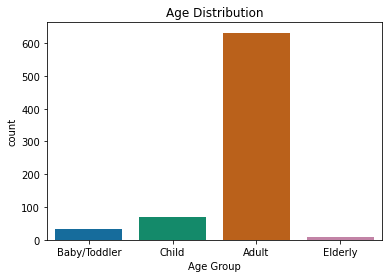

In [227]:
sns.countplot(x=train_rebal["Age_c"])
plt.xlabel('Age Group')
plt.title('Age Distribution')

Distribution of family count:

In [228]:
train_rebal['Fam'].value_counts()

0     427
1     142
2     104
3      29
5      15
4      11
6       9
7       5
10      4
Name: Fam, dtype: int64

Text(0.5, 1.0, 'Family Count Distribution')

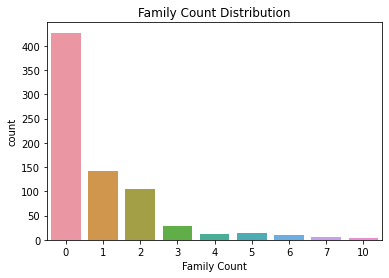

In [229]:
sns.countplot(x=train_rebal["Fam"])
plt.xlabel('Family Count')
plt.title('Family Count Distribution')

Overall, babies/toddler shows the highest death and survival chance. Children's survival chance is not much difference from babies/toddler but has a significant less death count. Adult have a slightly higher survival chance compared to death but less survival chance compared to babies or child. Elderly only has death counts. 

Text(0.5, 1.0, 'Suvival by Age Against Family Count')

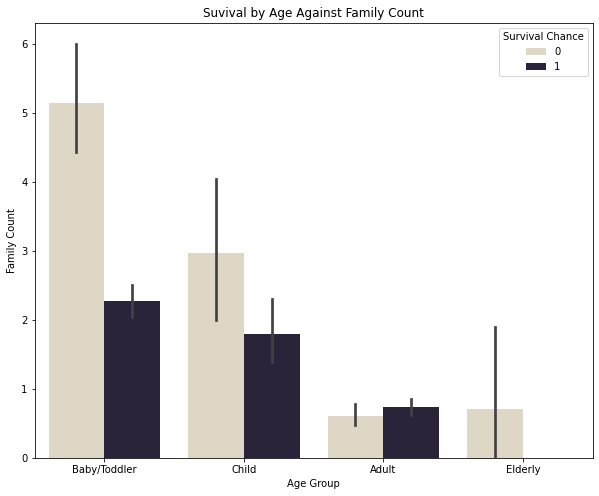

In [230]:
sns.barplot(data= train_rebal,x = 'Age_c', y = 'Fam', 
            hue = 'Survived', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(10, 8)
plt.xlabel('Age Group')
plt.ylabel('Family Count')
plt.legend(loc='upper right', title = 'Survival Chance')
plt.title("Suvival by Age Against Family Count")

Plot below shows the relationship between age and number of family members there are with. 

Text(0.5, 1.0, 'Age Agaisnt Family Count')

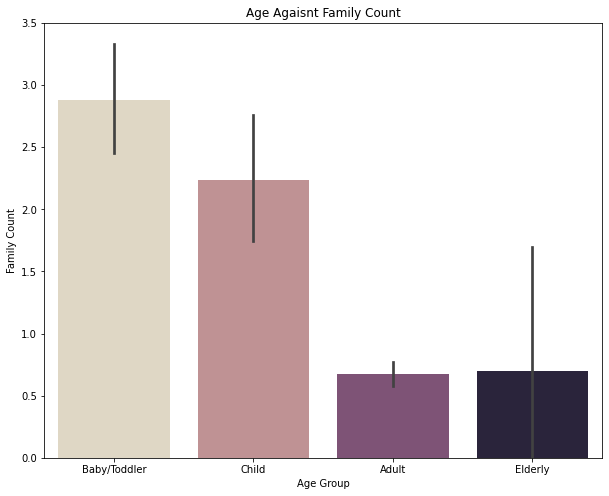

In [231]:
sns.barplot(data= train_rebal,x = 'Age_c', y = 'Fam'
            , palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(10, 8)
plt.xlabel('Age Group')
plt.ylabel('Family Count')
plt.title("Age Agaisnt Family Count")

Contingency table for age and Survived:

In [232]:
A1 = pd.crosstab(train_rebal['Survived'], train_rebal['Age_c'], 
                 margins=True)
A1

Age_c,Baby/Toddler,Child,Adult,Elderly,All
Survived,,,,,
0,7,27,329,10,373
1,26,44,303,0,373
All,33,71,632,10,746


Plot below shows that chance of survival decreases along the age group (from youngest to old). 

Text(0.5, 1.0, 'Suvival by Age')

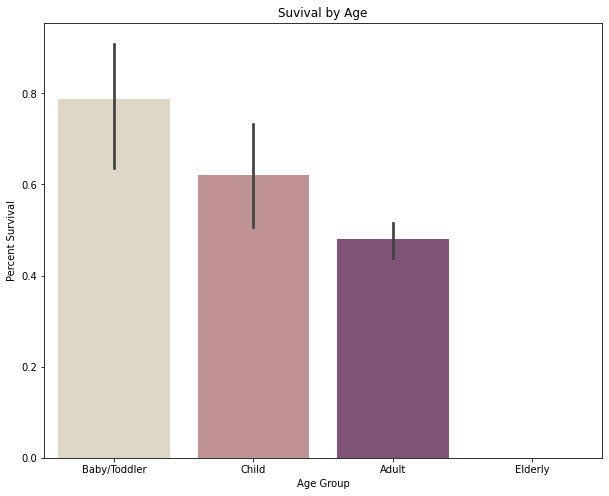

In [233]:
sns.barplot(data= train_rebal,x = 'Age_c', y = 'Survived'
            , palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(10, 8)
plt.xlabel('Age Group')
plt.ylabel('Percent Survival')
plt.title("Suvival by Age")

Contingency table for family count and Survived:

In [234]:
F1 = pd.crosstab(train_rebal['Survived'], train_rebal['Fam'], 
                 margins=True)
F1

Fam,0,1,2,3,4,5,6,7,10,All
Survived,,,,,,,,,,
0,252,52,31,5,6,13,5,5,4,373
1,175,90,73,24,5,2,4,0,0,373
All,427,142,104,29,11,15,9,5,4,746


Plot below shows that there is higher chance of survival from having 3 family members.

Text(0.5, 1.0, 'Suvival by Family Count')

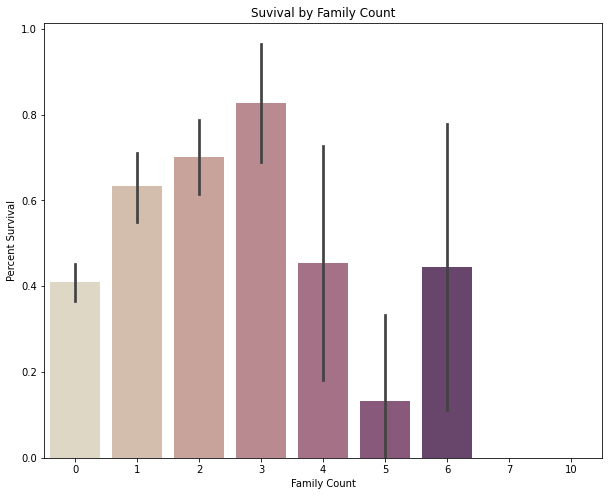

In [235]:
sns.barplot(data= train_rebal,x = 'Fam', y = 'Survived'
            , palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(10, 8)
plt.xlabel('Family Count')
plt.ylabel('Percent Survival')
plt.title("Suvival by Family Count")

### Sex and Family

Overall view, females and having a family count of 3 are attributes that shows higher chance of survival. 

Text(0.5, 1.0, 'Suvival by Sex Against Family Count')

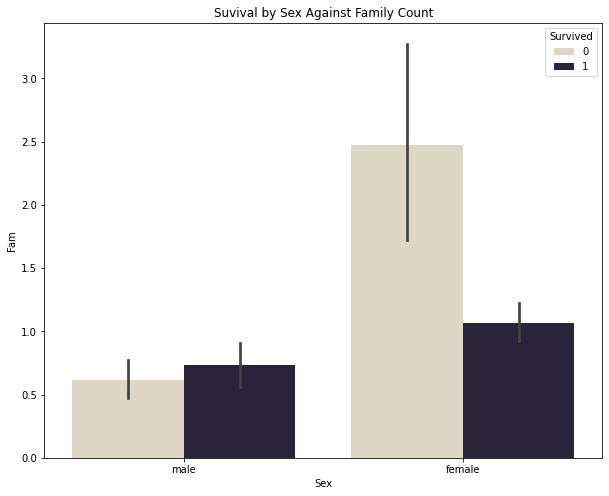

In [236]:
sns.barplot(data= train_rebal,x = 'Sex', y = 'Fam', 
            hue = 'Survived', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(10, 8)
plt.title("Suvival by Sex Against Family Count")

Text(0.5, 1.0, 'Sex Against Family Count')

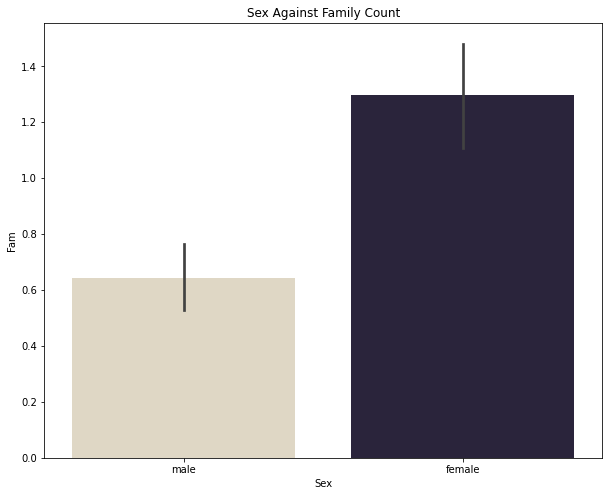

In [237]:
sns.barplot(data= train_rebal,x = 'Sex', y = 'Fam', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(10, 8)
plt.title("Sex Against Family Count")

Text(0.5, 1.0, 'Suvival by Sex')

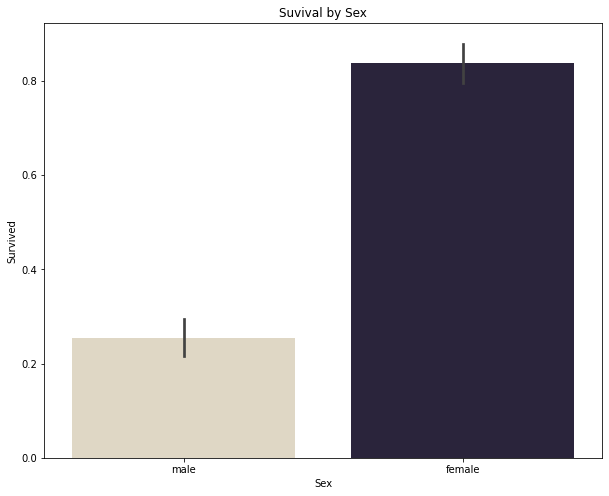

In [238]:
sns.barplot(data= train_rebal,x = 'Sex', y = 'Survived', 
            palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(10, 8)
plt.title("Suvival by Sex")

### Extract Titles from Names
Titles could give us an indication of marital status and occupation. 

In [239]:
train_rebal['Title'] = (train_rebal['Name'].str.split(',').str[1])
train_rebal['Title'] = (train_rebal['Title'].str.split('.').str[0])
train_rebal.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_c,Fam,Fare2,Ticket2,Title
65,66,1,3,"Moubarek, Master. Gerios",male,28.25,1,1,2661,15.2458,C,Adult,2,Mid,2,Master
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,S,Child,2,Max,3,Master
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,35273,113.2750,C,Adult,2,Max,3,Mr
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.00,1,0,36947,78.2667,C,Adult,1,Max,3,Mrs
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.00,1,0,17474,57.0000,S,Adult,1,Max,1,Mr
397,398,0,2,"McKane, Mr. Peter David",male,46.00,0,0,28403,26.0000,S,Adult,0,High,2,Mr
810,811,0,3,"Alexander, Mr. William",male,26.00,0,0,3474,7.8875,S,Adult,0,Low,3,Mr
273,274,0,1,"Natsch, Mr. Charles H",male,37.00,0,1,PC 17596,29.7000,C,Adult,1,High,P,Mr
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.00,1,1,13567,79.2000,C,Adult,2,Max,1,Mr
673,674,1,2,"Wilhelms, Mr. Charles",male,31.00,0,0,244270,13.0000,S,Adult,0,Mid,2,Mr


In [240]:
#show all titles
train_rebal['Title'].value_counts()

 Mr              379
 Miss            180
 Mrs             127
 Master           35
 Rev               6
 Dr                4
 Mme               2
 Col               2
 Sir               2
 Ms                2
 the Countess      2
 Don               1
 Major             1
 Mlle              1
 Jonkheer          1
 Capt              1
Name: Title, dtype: int64

In [241]:
#show titles vs sex
train_rebal['Title'] = train_rebal.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_rebal['Title'], train_rebal['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,2,0
Don,0,1
Dr,0,4
Jonkheer,0,1
Major,0,1
Master,0,35
Miss,180,0


There are four main titles: Mr., Miss., Mrs., Master. as well as others that denote occupation (e.g Dr., Rev., Capt.). 

'Mlle' (Madamoiselle) and 'Ms'(short for Miss) can be combined with 'Miss' to specify unmarried women. 

'Mme' (Madame) and 'Countess' (wife of an Earl) can be combined with 'Mrs' to specify married women.

'Master' is usually used for underage boys < 18 y.o

Other titles are all held by men, and will be combined with 'Mr'.

In [242]:
#combine all titles into four main categories (Miss, Mrs, Mr, Master)
train_rebal['Title'] = train_rebal['Title'].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Mr')

train_rebal['Title'] = train_rebal['Title'].replace('Mlle', 'Miss')
train_rebal['Title'] = train_rebal['Title'].replace('Ms', 'Miss')
train_rebal['Title'] = train_rebal['Title'].replace('Countess', 'Mrs')
train_rebal['Title'] = train_rebal['Title'].replace('Mme', 'Mrs')


In [243]:
#show new value counts
train_rebal['Title'].value_counts()

Mr        397
Miss      183
Mrs       131
Master     35
Name: Title, dtype: int64

In [244]:
#create a contingency table of survival counts according to title
crosstab_title=pd.crosstab(train_rebal['Survived'], train_rebal['Title'])
crosstab_title

Title,Master,Miss,Mr,Mrs
Survived,,,,
0,10,32,312,19
1,25,151,85,112


In [245]:
#show likelihood of survival
train_rebal[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.714286
1,Miss,0.825137
2,Mr,0.214106
3,Mrs,0.854962


In [246]:
#show proportions
round(crosstab_title.div(crosstab_title.sum(0), axis=1)*100, 1)

Title,Master,Miss,Mr,Mrs
Survived,,,,
0,28.6,17.5,78.6,14.5
1,71.4,82.5,21.4,85.5


Most likely to survive: 

    Unmarried women, Miss 

    Married women, Mrs

    Young boys, Master

Least likely to surive: 

    Men, Mr

Text(0.5, 1.0, '(a) Survival Count by Title')

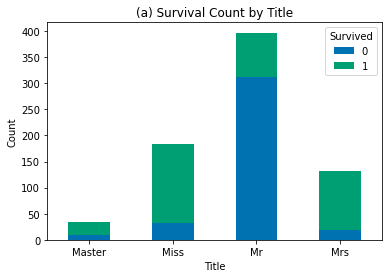

In [247]:
#barchart of Title vs. Survived

pd.crosstab(train_rebal['Title'], train_rebal['Survived']).plot(kind='bar',
                                                                stacked=True)
plt.xticks(rotation=360)
plt.ylabel('Count')
plt.title('(a) Survival Count by Title')

Text(0.5, 1.0, 'Survival Proportion by Title')

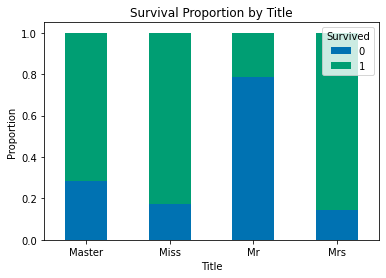

In [248]:
#normalized barchart for survival by title
norm_crosstab_title=pd.crosstab(train_rebal['Title'], train_rebal['Survived']).div(pd.crosstab(train_rebal['Title'], train_rebal['Survived']).sum( axis=1), axis = 0) #normalized contingency table
norm_crosstab_title.plot(kind='bar', stacked=True)
plt.xticks(rotation=360)
plt.ylabel('Proportion')
plt.title('Survival Proportion by Title')

### Sex

In [249]:
train_rebal['Sex'].value_counts()

male      432
female    314
Name: Sex, dtype: int64

Sex is a binary, nominal variable with two values: Male or Female. 

In [250]:
#create a contingency table survial counts according to sex
crosstab_sex=pd.crosstab(train_rebal['Sex'], train_rebal['Survived'])
#crosstab_sex['Total']=crosstab_sex.sum(axis=1) 
#crosstab_sex.loc['Total'] = crosstab_sex.sum() 
crosstab_sex

Survived,0,1
Sex,,
female,51,263
male,322,110


In [251]:
#show proportions
crosstab_sex2=pd.crosstab(train_rebal['Survived'], train_rebal['Sex'])
round(crosstab_sex2.div(crosstab_sex2.sum(0), axis=1)*100, 1)

Sex,female,male
Survived,,
0,16.2,74.5
1,83.8,25.5


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

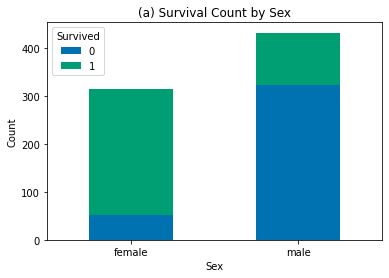

In [252]:
#barchart of Sex vs. Survived
crosstab_sex.plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.title('(a) Survival Count by Sex')
plt.xticks(rotation=360)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

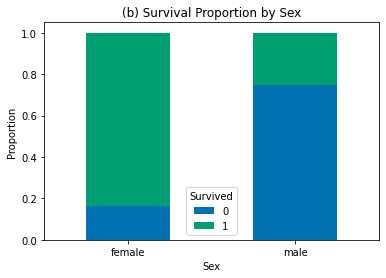

In [253]:
#normalized bar graph of survival proportions according to sex
norm_crosstab_sex=crosstab_sex.div(crosstab_sex.sum( axis=1), axis = 0) #normalized contingency table
norm_crosstab_sex.plot(kind='bar', stacked=True)
plt.ylabel('Proportion')
plt.title('(b) Survival Proportion by Sex')
plt.xticks(rotation=360)

Proportionally more females survived than males. This confirms what we already know, since it is common knowledge that women and children were the first to board the rescue boats.  

### Fare

In [254]:
train_rebal['Fare'].describe()

count    746.000000
mean      36.630791
std       55.696840
min        0.000000
25%        7.956250
50%       16.100000
75%       36.940650
max      512.329200
Name: Fare, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


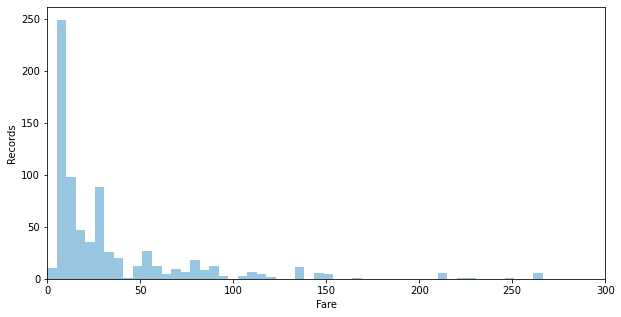

In [255]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.xlim(0,300)
plt.xlabel('Fare')
plt.ylabel('Records')
sns.distplot(train_rebal['Fare'],bins=100,kde=False)
plt.show()

Text(0.5, 1.0, 'Fare Distribution')

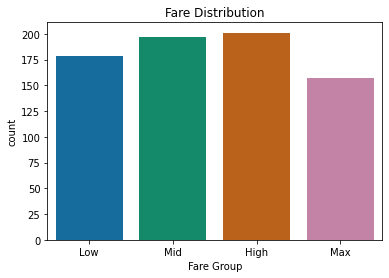

In [256]:
sns.countplot(x=train_rebal["Fare2"])
plt.xlabel('Fare Group')
plt.title('Fare Distribution')

In [257]:
train_rebal['Fare2'].value_counts()

High    201
Mid     197
Low     178
Max     157
Name: Fare2, dtype: int64

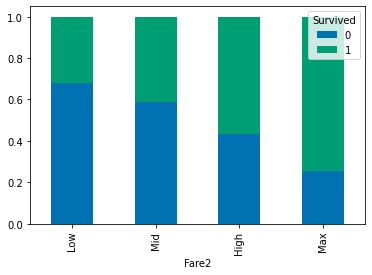

In [258]:
crosstab_fare=pd.crosstab(train_rebal['Fare2'], train_rebal['Survived'])
norm_crosstab_fare=crosstab_fare.div(crosstab_fare.sum( axis=1), axis = 0) #normalized contingency table
norm_crosstab_fare.plot(kind='bar', stacked=True)

### Embarked

In [259]:
train_rebal['Embarked'].value_counts()

S    537
C    147
Q     62
Name: Embarked, dtype: int64



```
`# This is formatted as code`
```

Embarked is a nominal categorical variable that defines the port of embarkation for each passenger. There are three possible values: C (Cherbourg), Q (Queenstown), and S (South Hampton).

The mode (S) is used to impute for null values. 

In [260]:
#impute for missing values
train_rebal['Embarked']=train_rebal['Embarked'].fillna('S')
train_rebal['Embarked'].isnull().sum()

0

In [261]:
#create a contingency table of survival counts for each port of embarkation
crosstab_embk=pd.crosstab(train_rebal['Embarked'], train_rebal['Survived'])
#crosstab_embk['Total']=crosstab_embk.sum(axis=1) 
#crosstab_embk.loc['Total'] = crosstab_embk.sum() 
crosstab_embk

Survived,0,1
Embarked,,
C,49,98
Q,29,33
S,295,242


Text(0.5, 1.0, '(a) Survival Count by Port of Embarkation')

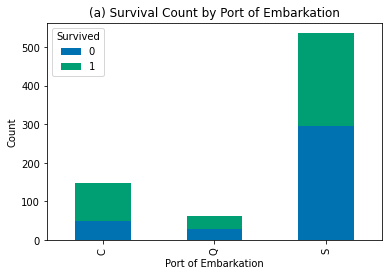

In [262]:
#barchart of Sex vs. Survived
crosstab_embk.plot(kind='bar', stacked=True)
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.title('(a) Survival Count by Port of Embarkation')

Text(0.5, 1.0, '(b) Survival Proportion by Port of Embarkation')

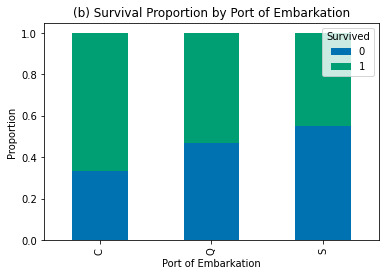

In [263]:
#show proportions
crosstab_embk = round(crosstab_embk.div(crosstab_embk.sum(0), axis=1)*100, 1)
norm_crosstab_embk=crosstab_embk.div(crosstab_embk.sum( axis=1), axis = 0) #normalized contingency table
norm_crosstab_embk.plot(kind='bar', stacked=True)
plt.xlabel('Port of Embarkation')
plt.ylabel('Proportion')
plt.title('(b) Survival Proportion by Port of Embarkation')

Passengers who boarded at Port C were the most likely to survive, followed by Q, and then S. 

### Pclass

In [264]:
train_rebal['Pclass'].value_counts()

3    372
1    218
2    156
Name: Pclass, dtype: int64

In [265]:
crosstab_Pclass = pd.crosstab(train_rebal['Pclass'], train_rebal['Survived'])
crosstab_Pclass

Survived,0,1
Pclass,,
1,59,159
2,66,90
3,248,124


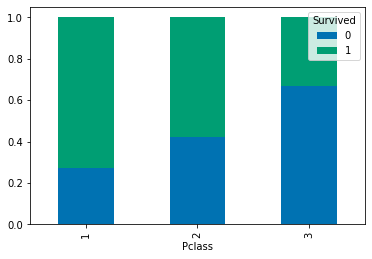

In [266]:
crosstab_Pclass = round(crosstab_Pclass.div(crosstab_Pclass.sum(0), axis=1)*100, 1)
norm_crosstab_Pclass= crosstab_Pclass.div(crosstab_Pclass.sum( axis=1), axis = 0) #normalized contingency table
norm_crosstab_Pclass.plot(kind='bar', stacked=True)

### Ticket

In [267]:
train_rebal['Ticket2'].value_counts()

3    241
2    149
1    148
P     58
S     52
C     42
A     16
W      9
4      8
F      7
7      6
6      6
5      2
9      1
L      1
Name: Ticket2, dtype: int64

In [268]:
crosstab_tick=pd.crosstab(train_rebal['Ticket2'], train_rebal['Survived'])
crosstab_tick

Survived,0,1
Ticket2,,
1,39,109
2,59,90
3,162,79
4,4,4
5,2,0
6,2,4
7,5,1
9,0,1
A,16,0


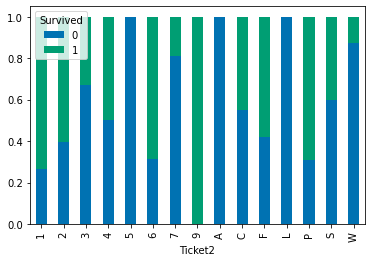

In [269]:
crosstab_tick = round(crosstab_tick.div(crosstab_tick.sum(0), axis=1)*100, 1)
norm_crosstab_tick=crosstab_tick.div(crosstab_tick.sum( axis=1), axis = 0) #normalized contingency table
norm_crosstab_tick.plot(kind='bar', stacked=True)

##Fare2 vs Ticket2

In [270]:
crossa =pd.crosstab(train_rebal['Fare2'], train_rebal['Ticket2'])
crossa

Ticket2,1,2,3,4,5,6,7,9,A,C,F,P,S,W
Fare2,,,,,,,,,,,,,,
Low,8,21,116,0,0,0,0,1,6,3,1,0,21,1
Mid,1,59,71,7,1,4,6,0,9,13,1,3,21,1
High,53,56,37,1,1,2,0,0,1,22,4,14,6,4
Max,82,9,17,0,0,0,0,0,0,4,1,37,4,3


In [271]:
resa = chi2_contingency(crossa)
print('The P-Value is: ', resa[1])

The P-Value is:  4.103614231972349e-72


A very low p value indicates that we should reject the null hypothesis and accept the sad truth that these two are highly ocrrelated.

##Pclass vs Embark

In [272]:
cross =pd.crosstab(train_rebal['Embarked'], train_rebal['Pclass'])
cross

Pclass,1,2,3
Embarked,,,
C,82,11,54
Q,3,3,56
S,133,142,262


In [273]:
res = chi2_contingency(cross)
print('The P-Value is: ', res[1])

The P-Value is:  6.63083673802121e-22


A very low p value indicates that we should reject the null hypothesis and accept the sad truth that these two are highly ocrrelated.

# Prepare Data for Modeling

## Convert Categorical Variables into Dummies

### Training Set

In [274]:
sex_dummies = pd.get_dummies(train_rebal['Sex'], prefix = 'Sex', drop_first=False)
sex_dummies

,Sex_female,Sex_male
65,0,1
445,0,1
659,0,1
591,1,0
690,0,1
...,...,...
275,1,0
839,0,1
577,1,0
400,0,1


In [275]:
fare_dummies = pd.get_dummies(train_rebal['Sex'], prefix = 'Sex', drop_first=False)
sex_dummies

,Sex_female,Sex_male
65,0,1
445,0,1
659,0,1
591,1,0
690,0,1
...,...,...
275,1,0
839,0,1
577,1,0
400,0,1


In [276]:
pclass_dummies = pd.get_dummies(train_rebal['Pclass'], prefix = 'Pclass', drop_first=False)
pclass_dummies

,Pclass_1,Pclass_2,Pclass_3
65,0,0,1
445,1,0,0
659,1,0,0
591,1,0,0
690,1,0,0
...,...,...,...
275,1,0,0
839,1,0,0
577,1,0,0
400,0,0,1


In [277]:
embarked_dummies = pd.get_dummies(train_rebal['Embarked'], prefix = 'Embarked', drop_first=False)
embarked_dummies

,Embarked_C,Embarked_Q,Embarked_S
65,1,0,0
445,0,0,1
659,1,0,0
591,1,0,0
690,0,0,1
...,...,...,...
275,0,0,1
839,1,0,0
577,0,0,1
400,0,0,1


In [278]:
age_dummies = pd.get_dummies(train_rebal['Age_c'], prefix = 'Age', drop_first=False)
age_dummies

,Age_Baby/Toddler,Age_Child,Age_Adult,Age_Elderly
65,0,0,1,0
445,0,1,0,0
659,0,0,1,0
591,0,0,1,0
690,0,0,1,0
...,...,...,...,...
275,0,0,1,0
839,0,0,1,0
577,0,0,1,0
400,0,0,1,0


In [279]:
ticket2_dummies = pd.get_dummies(train_rebal['Ticket2'], prefix = 'Ticket2', drop_first=False)
ticket2_dummies

,Ticket2_1,Ticket2_2,Ticket2_3,Ticket2_4,Ticket2_5,Ticket2_6,Ticket2_7,Ticket2_9,Ticket2_A,Ticket2_C,Ticket2_F,Ticket2_L,Ticket2_P,Ticket2_S,Ticket2_W
65,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
445,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
659,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
591,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
690,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
839,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
577,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
400,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Test Set

In [280]:
sex_dummies_test = pd.get_dummies(test['Sex'], prefix = 'Sex', drop_first=False)
pclass_dummies_test = pd.get_dummies(test['Pclass'], prefix = 'Pclass', drop_first=False)
embarked_dummies_test = pd.get_dummies(test['Embarked'], prefix = 'Embarked', drop_first=False)
age_dummies_test = pd.get_dummies(test['Age_c'], prefix = 'Age', drop_first=False)
ticket2_dummies_test = pd.get_dummies(test['Ticket2'], prefix = 'Ticket2', drop_first=False)

## Standardize Numeric Variables
Numeric variables are normalized using Min-Max scaling

Numeric variables include: Age, Fare, Fam

In [281]:
#normalized variables are added back into original df as new columns 'Var_mm'
train_rebal['Age_mm'] = MinMaxScaler().fit_transform(train_rebal[['Age']])
#train_rebal['Fare_mm'] = MinMaxScaler().fit_transform(train_rebal[['Fare']])
#train_rebal['Fam_mm'] = MinMaxScaler().fit_transform(train_rebal[['Fam']])
train_rebal.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_c,Fam,Fare2,Ticket2,Title,Age_mm
65,66,1,3,"Moubarek, Master. Gerios",male,28.25,1,1,2661,15.2458,C,Adult,2,Mid,2,Master,0.394304
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,S,Child,2,Max,3,Master,0.050723
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,35273,113.2750,C,Adult,2,Max,3,Mr,0.815812
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.00,1,0,36947,78.2667,C,Adult,1,Max,3,Mrs,0.730802
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.00,1,0,17474,57.0000,S,Adult,1,Max,1,Mr,0.433267
397,398,0,2,"McKane, Mr. Peter David",male,46.00,0,0,28403,26.0000,S,Adult,0,High,2,Mr,0.645792
810,811,0,3,"Alexander, Mr. William",male,26.00,0,0,3474,7.8875,S,Adult,0,Low,3,Mr,0.362426
273,274,0,1,"Natsch, Mr. Charles H",male,37.00,0,1,PC 17596,29.7000,C,Adult,1,High,P,Mr,0.518277
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.00,1,1,13567,79.2000,C,Adult,2,Max,1,Mr,0.844148
673,674,1,2,"Wilhelms, Mr. Charles",male,31.00,0,0,244270,13.0000,S,Adult,0,Mid,2,Mr,0.433267


# Models

## Logistic Regression

In [282]:
train_rebal.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_c,Fam,Fare2,Ticket2,Title,Age_mm
65,66,1,3,"Moubarek, Master. Gerios",male,28.25,1,1,2661,15.2458,C,Adult,2,Mid,2,Master,0.394304
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,S,Child,2,Max,3,Master,0.050723
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.00,0,2,35273,113.2750,C,Adult,2,Max,3,Mr,0.815812
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.00,1,0,36947,78.2667,C,Adult,1,Max,3,Mrs,0.730802
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.00,1,0,17474,57.0000,S,Adult,1,Max,1,Mr,0.433267


In [283]:
train_rebal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 65 to 383
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  746 non-null    int64   
 1   Survived     746 non-null    int64   
 2   Pclass       746 non-null    int64   
 3   Name         746 non-null    object  
 4   Sex          746 non-null    object  
 5   Age          746 non-null    float64 
 6   SibSp        746 non-null    int64   
 7   Parch        746 non-null    int64   
 8   Ticket       746 non-null    object  
 9   Fare         746 non-null    float64 
 10  Embarked     746 non-null    object  
 11  Age_c        746 non-null    category
 12  Fam          746 non-null    int64   
 13  Fare2        733 non-null    category
 14  Ticket2      746 non-null    object  
 15  Title        746 non-null    object  
 16  Age_mm       746 non-null    float64 
dtypes: category(2), float64(3), int64(6), object(6)
memory usage: 111.3+ KB


Correlation Matrix: 

*Note that corr() applies to numeric variables only. 

In [284]:
train_rebal.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fam,Age_mm
PassengerId,1.000000,-0.035589,0.010040,0.001134,-0.013229,0.095082,0.006657,0.040526,0.001134
Survived,-0.035589,1.000000,-0.347120,-0.074136,-0.032727,0.108903,0.233654,0.034530,-0.074136
Pclass,0.010040,-0.347120,1.000000,-0.348372,0.062213,0.012752,-0.552360,0.048712,-0.348372
Age,0.001134,-0.074136,-0.348372,1.000000,-0.211754,-0.205865,0.129484,-0.250335,1.000000
SibSp,-0.013229,-0.032727,0.062213,-0.211754,1.000000,0.386197,0.131973,0.877294,-0.211754
Parch,0.095082,0.108903,0.012752,-0.205865,0.386197,1.000000,0.194591,0.781525,-0.205865
Fare,0.006657,0.233654,-0.552360,0.129484,0.131973,0.194591,1.000000,0.190509,0.129484
Fam,0.040526,0.034530,0.048712,-0.250335,0.877294,0.781525,0.190509,1.000000,-0.250335
Age_mm,0.001134,-0.074136,-0.348372,1.000000,-0.211754,-0.205865,0.129484,-0.250335,1.000000


Prepare separate predictors from response:

In [285]:
#Predictors
X_logi = pd.DataFrame(train_rebal[['Pclass', 'Fam', 'Age', 'Fare', 'Sex']])


X_logi

,Pclass,Fam,Age,Fare,Sex
65,3,2,28.25,15.2458,male
445,1,2,4.00,81.8583,male
659,1,2,58.00,113.2750,male
591,1,1,52.00,78.2667,female
690,1,1,31.00,57.0000,male
...,...,...,...,...,...
275,1,1,63.00,77.9583,female
839,1,0,28.25,29.7000,male
577,1,1,39.00,55.9000,female
400,3,0,39.00,7.9250,male


In [286]:
#Response
y_logi = pd.DataFrame(train_rebal[['Survived']])
y_logi

,Survived
65,1
445,1
659,0
591,1
690,1
...,...
275,1
839,1
577,1
400,1


Convert catergorical variable to numerical:

In [287]:
X_logi['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)

Convert predictors to dummy variables:


In [288]:
X_logi_d = pd.get_dummies(X_logi)


X_logi_d.head()

,Pclass,Fam,Age,Fare,Sex
65,3,2,28.25,15.2458,0
445,1,2,4.00,81.8583,0
659,1,2,58.00,113.2750,0
591,1,1,52.00,78.2667,1
690,1,1,31.00,57.0000,0


Logistic Regression Model:

In [289]:
#Add contant to X_logi
X_logi_d = sm.add_constant(X_logi_d)


logreg01 = sm.Logit(y_logi, X_logi_d).fit()
logreg01.summary2()

Optimization terminated successfully.
         Current function value: 0.428228
         Iterations 6


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.382     
Dependent Variable: Survived         AIC:              650.9157  
Date:               2022-12-09 22:55 BIC:              678.6040  
No. Observations:   746              Log-Likelihood:   -319.46   
Df Model:           5                LL-Null:          -517.09   
Df Residuals:       740              LLR p-value:      3.1177e-83
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      3.2571     0.5057    6.4405   0.0000    2.2659    4.2483
Pclass    -1.2666     0.1502   -8.4350   0.0000   -1.5609   -0.9723
Fam       -0.2664     0.0726   -3.6709   0.0002   -0.4087   -0.1242
Age       -0.0503     0.0084   -5.9807   0.0000   -0.0668   -0.0338
Fare       0.0009     0.0021    0.4048   0.6856   -0.0033    0.0050
Sex        3.1643     0.2331   13.5721   0.0000    2.7073    3.6212
=================================================================

"""

Logistic Regression Shaving: 

Removed Ticket2 because it's showing NANs for the metrics. 

Embarked is showing multicollinearity with very high Std Error, 0 values for z score, and p-value of 1. 



Logistic Regression Interpreattion: 

Model has a pseudo R^2 of 36.3% which suggest that the model is a good fit. LLR p-value is less than 0.5 significance level. BIC is slightly higher than AIC but they are around the same ball park. All the varible metrics look reasonable. 

In [290]:
lg_pred_tr = logreg01.predict(X_logi_d)
lg_pred_tr_logis = np.where (lg_pred_tr > 0.5, 1, 0)

### Test Dataset Validation

In [291]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_c,Fam,Ticket2
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,S,Adult,0,3
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,S,Adult,1,2
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,S,Adult,0,3
46,47,0,3,"Lennon, Mr. Denis",male,28.0,1,0,370371,15.5000,Q,Adult,1,3
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,S,Adult,0,1


In [292]:
X_logi_test = pd.DataFrame(test[['Pclass', 'Fam', 'Age', 'Fare', 'Sex']])
y_logi_test = pd.DataFrame(test[['Survived']])

In [293]:
X_logi_test['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)
X_logi_d_test = pd.get_dummies(X_logi_test)

In [294]:
X_logi_d_test

,Pclass,Fam,Age,Fare,Sex
725,3,0,20.0,8.6625,0
861,2,1,21.0,11.5000,0
528,3,0,39.0,7.9250,0
46,3,1,28.0,15.5000,0
627,1,0,21.0,77.9583,1
...,...,...,...,...,...
360,3,5,40.0,27.9000,0
856,1,2,45.0,164.8667,1
199,2,0,24.0,13.0000,1
451,3,1,28.0,19.9667,0


In [295]:
X_logi_d_test = sm.add_constant(X_logi_d_test)

logreg01_test = sm.Logit(y_logi_test, X_logi_d_test).fit()
logreg01_test.summary2()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.485070
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.281     
Dependent Variable: Survived         AIC:              298.1912  
Date:               2022-12-09 22:55 BIC:              320.3130  
No. Observations:   295              Log-Likelihood:   -143.10   
Df Model:           5                LL-Null:          -198.94   
Df Residuals:       289              LLR p-value:      1.8066e-22
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      0.4190     0.8941    0.4686   0.6393   -1.3334    2.1714
Pclass    -0.6449     0.2470   -2.6113   0.0090   -1.1289   -0.1609
Fam       -0.2508     0.1225   -2.0473   0.0406   -0.4909   -0.0107
Age       -0.0147     0.0129   -1.1432   0.2530   -0.0400    0.0105
Fare       0.0175     0.0081    2.1679   0.0302    0.0017    0.0333
Sex        2.2155     0.3216    6.8896   0.0000    1.5852    2.8458
=================================================================

"""

### Contingency Table

Predictions: 

In [296]:
predictions_prob = logreg01_test.predict(X_logi_d_test)
predictions_prob.head()

725    0.159946
861    0.226244
528    0.124425
46     0.129246
627    0.954487
dtype: float64

In [297]:
cutoff = 0.5

In [298]:
ypred_logis = np.where (predictions_prob > cutoff, 1, 0)
#ypred_c['Survived'] = pd.DataFrame(ypred_logis)
#ypred_c

In [299]:
conf_matrix = pd.crosstab(test['Survived'], ypred_logis,
                          rownames = ["Actual"],
                          colnames = ["Predicted"],
                          margins = True)
conf_matrix

Predicted,0,1,All
Actual,,,
0,149,27,176
1,36,83,119
All,185,110,295


### Evaluation Metrics

In [300]:
#Baseline
#Accuracy (all negative model) = TAN/GT

logis_baseline = round((176/296)*100, 2)
logis_baseline

59.46

In [301]:
#Accuracy = (TN+TP) / GT

logis_a = round(((150+82)/295)*100, 2)
logis_a

78.64

In [302]:
#Error rate = 1-Accuracy

logis_e = round(100-78.38, 2)
logis_e

21.62

In [303]:
#Sensitivity: Recall = TP/TAP

logis_r = round((82/119)*100, 2)
logis_r

68.91

In [304]:
#Specificity: Specificity = TN/TAN

logis_s = round((150/176)*100, 2)
logis_s

85.23

In [305]:
logis_t = [ ['Metrics', 'Score, %'],
         ['Accuracy, base', logis_baseline], 
         ['Accuracy', logis_a], 
         ['Error rate', logis_e],
         ['Sensitivity', logis_r],
         ['Specificity', logis_s],
         ]

print(tabulate(logis_t, headers= 'firstrow'))

Metrics           Score, %
--------------  ----------
Accuracy, base       59.46
Accuracy             78.64
Error rate           21.62
Sensitivity          68.91
Specificity          85.23


## K-means Clustering

In [306]:
#Predictors
X_kmeans = train_rebal[['Pclass', 'Fam', 
                                     'Age', 'Fare']]
X_kmeans

,Pclass,Fam,Age,Fare
65,3,2,28.25,15.2458
445,1,2,4.00,81.8583
659,1,2,58.00,113.2750
591,1,1,52.00,78.2667
690,1,1,31.00,57.0000
...,...,...,...,...
275,1,1,63.00,77.9583
839,1,0,28.25,29.7000
577,1,1,39.00,55.9000
400,3,0,39.00,7.9250


Standardize predictors using Z-score transformation: 

*Note: only numeric data

In [307]:
X_kmns = pd.DataFrame(stats.zscore(X_kmeans), 
                      columns=['Pclass', 'Fam', 'Age','Fare'])

K-means clustering model: 

In [308]:
kmeans01 = KMeans(n_clusters = 4).fit(X_kmns)

kmeans01

KMeans(n_clusters=4)

Investigate: 

In [309]:
cluster = kmeans01.labels_

In [310]:
Cluster1 = X_kmeans.loc[cluster == 0]

Cluster2 = X_kmeans.loc[cluster == 1]

Cluster3 = X_kmeans.loc[cluster == 2]

Cluster4 = X_kmeans.loc[cluster == 3]

In [311]:
Cluster1.describe()

,Pclass,Fam,Age,Fare
count,103.000000,103.000000,103.000000,103.000000
mean,2.611650,3.533981,11.902913,32.175321
std,0.564176,2.066614,11.782431,19.788354
min,1.000000,1.000000,0.420000,7.854200
25%,2.000000,2.000000,2.000000,19.258300
50%,3.000000,3.000000,8.000000,27.750000
75%,3.000000,5.000000,19.500000,36.877100
max,3.000000,10.000000,48.000000,120.000000


In [312]:
Cluster2.describe()

,Pclass,Fam,Age,Fare
count,232.000000,232.000000,232.000000,232.000000
mean,1.168103,0.741379,39.114224,59.230280
std,0.374767,0.854027,12.762562,38.327296
min,1.000000,0.000000,16.000000,0.000000
25%,1.000000,0.000000,28.250000,26.550000
50%,1.000000,1.000000,36.000000,52.000000
75%,1.000000,1.000000,48.250000,83.475000
max,2.000000,4.000000,71.000000,153.462500


In [313]:
Cluster3.describe()

,Pclass,Fam,Age,Fare
count,390.000000,390.000000,390.000000,390.000000
mean,2.782051,0.276923,28.014744,11.188694
std,0.413383,0.591483,7.940711,6.942283
min,2.000000,0.000000,11.000000,0.000000
25%,3.000000,0.000000,23.250000,7.750000
50%,3.000000,0.000000,28.250000,8.050000
75%,3.000000,0.000000,30.000000,13.000000
max,3.000000,2.000000,70.500000,73.500000


In [314]:
Cluster4.describe()

,Pclass,Fam,Age,Fare
count,21.0,21.000000,21.000000,21.000000
mean,1.0,1.952381,30.107143,281.309333
std,0.0,1.935877,11.629319,118.925800
min,1.0,0.000000,15.000000,151.550000
25%,1.0,0.000000,23.000000,211.337500
50%,1.0,1.000000,28.250000,247.520800
75%,1.0,4.000000,35.000000,263.000000
max,1.0,5.000000,64.000000,512.329200


### Test Dataset Validation

In [315]:
X_kmeans_test = test[['Pclass', 'Fam', 
                                     'Age', 'Fare']]
X_kmeans_test

,Pclass,Fam,Age,Fare
725,3,0,20.0,8.6625
861,2,1,21.0,11.5000
528,3,0,39.0,7.9250
46,3,1,28.0,15.5000
627,1,0,21.0,77.9583
...,...,...,...,...
360,3,5,40.0,27.9000
856,1,2,45.0,164.8667
199,2,0,24.0,13.0000
451,3,1,28.0,19.9667


In [316]:
X_kmns_test = pd.DataFrame(stats.zscore(X_kmeans_test), 
                      columns=['Pclass', 'Fam', 'Age','Fare'])

kmeans_test = KMeans(n_clusters = 4).fit(X_kmns_test)

cluster_test = kmeans_test.labels_

In [317]:
Cluster1_test = X_kmeans_test.loc[cluster_test == 0]

Cluster2_test = X_kmeans_test.loc[cluster_test == 1]

Cluster3_test = X_kmeans_test.loc[cluster_test == 2]

Cluster4_test = X_kmeans_test.loc[cluster_test == 3]

In [318]:
Cluster1_test.describe()

,Pclass,Fam,Age,Fare
count,179.000000,179.000000,179.000000,179.000000
mean,2.793296,0.402235,26.642458,13.014968
std,0.406077,0.691193,9.255007,10.661127
min,2.000000,0.000000,1.000000,0.000000
25%,3.000000,0.000000,21.500000,7.750000
50%,3.000000,0.000000,28.000000,8.662500
75%,3.000000,1.000000,29.000000,14.477100
max,3.000000,2.000000,61.000000,73.500000


In [319]:
Cluster2_test.describe()

,Pclass,Fam,Age,Fare
count,76.000000,76.000000,76.000000,76.000000
mean,1.289474,0.447368,39.677632,41.242270
std,0.484858,0.640723,13.868599,24.971153
min,1.000000,0.000000,16.000000,0.000000
25%,1.000000,0.000000,28.000000,26.000000
50%,1.000000,0.000000,36.750000,30.500000
75%,2.000000,1.000000,49.250000,60.044800
max,3.000000,3.000000,80.000000,91.079200


In [320]:
Cluster3_test.describe()

,Pclass,Fam,Age,Fare
count,26.000000,26.000000,26.000000,26.000000
mean,2.846154,5.307692,20.653846,35.033019
std,0.367946,2.035077,12.699425,14.440364
min,2.000000,3.000000,1.000000,18.750000
25%,3.000000,4.000000,8.250000,25.850025
50%,3.000000,5.000000,24.500000,31.275000
75%,3.000000,6.000000,28.000000,39.687500
max,3.000000,10.000000,40.000000,69.550000


In [321]:
Cluster4_test.describe()

,Pclass,Fam,Age,Fare
count,14.0,14.000000,14.000000,14.000000
mean,1.0,1.500000,29.351429,165.804164
std,0.0,1.224745,16.176330,46.532749
min,1.0,0.000000,0.920000,110.883300
25%,1.0,0.250000,19.000000,133.650000
50%,1.0,1.500000,32.000000,151.550000
75%,1.0,2.750000,39.750000,211.860425
max,1.0,3.000000,50.000000,247.520800


##CART

Predictor Variables: Embarked, Age_c, Sex, Fam, Fare/Fare2, Pclass, Ticket



### Build Model

In [322]:
#save target variable as y_CART
y_dt = train_rebal[['Survived']]

#specify levels of target variable
y_dt_names = ["Did not survive", "Survived"]

In [323]:
#combine all predictor variables, with dummies for categorical attributes
X_dt = pd.concat([sex_dummies,
                     embarked_dummies,
                     age_dummies,
                     pclass_dummies,
                     train_rebal['Fare'],
                     train_rebal['Fam']], axis=1)
X_dt

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Baby/Toddler,Age_Child,Age_Adult,Age_Elderly,Pclass_1,Pclass_2,Pclass_3,Fare,Fam
65,0,1,1,0,0,0,0,1,0,0,0,1,15.2458,2
445,0,1,0,0,1,0,1,0,0,1,0,0,81.8583,2
659,0,1,1,0,0,0,0,1,0,1,0,0,113.2750,2
591,1,0,1,0,0,0,0,1,0,1,0,0,78.2667,1
690,0,1,0,0,1,0,0,1,0,1,0,0,57.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,1,0,0,0,1,0,0,1,0,1,0,0,77.9583,1
839,0,1,1,0,0,0,0,1,0,1,0,0,29.7000,0
577,1,0,0,0,1,0,0,1,0,1,0,0,55.9000,1
400,0,1,0,0,1,0,0,1,0,0,0,1,7.9250,0


In [324]:
#build model
cart01 = DecisionTreeClassifier(criterion = "gini").fit(X_dt, y_dt)
export_graphviz(cart01, out_file = "cart01.dot", class_names=y_dt_names)

In [325]:
#save predictions
pred_CART = cart01.predict(X_dt)

### Test Dataset Validation

In [326]:
#test dataset prep
#combine all predictor variables, with dummies for categorical attributes
X_dt_test = pd.concat([sex_dummies_test,
                     embarked_dummies_test,
                     age_dummies_test,
                     pclass_dummies_test,
                     test['Fare'],
                     test['Fam']], axis=1)
X_dt_test

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Baby/Toddler,Age_Child,Age_Adult,Age_Elderly,Pclass_1,Pclass_2,Pclass_3,Fare,Fam
725,0,1,0,0,1,0,0,1,0,0,0,1,8.6625,0
861,0,1,0,0,1,0,0,1,0,0,1,0,11.5000,1
528,0,1,0,0,1,0,0,1,0,0,0,1,7.9250,0
46,0,1,0,1,0,0,0,1,0,0,0,1,15.5000,1
627,1,0,0,0,1,0,0,1,0,1,0,0,77.9583,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0,1,0,0,1,0,0,1,0,0,0,1,27.9000,5
856,1,0,0,0,1,0,0,1,0,1,0,0,164.8667,2
199,1,0,0,0,1,0,0,1,0,0,1,0,13.0000,0
451,0,1,0,0,1,0,0,1,0,0,0,1,19.9667,1


In [327]:
#use CART model to make predictions on test dataset
pred_CART_test = cart01.predict(X_dt_test)

### Model Performance

In [328]:
#Show contingency table for actual vs. predicted
ypredCART = pd.crosstab(test['Survived'], pred_CART_test,
                   rownames= ['Actual'],
                   colnames = ['Predicted'])
ypredCART['Total']=ypredCART.sum(axis=1) 
ypredCART.loc['Total'] = ypredCART.sum() 
ypredCART

Predicted,0,1,Total
Actual,,,
0,151,25,176
1,42,77,119
Total,193,102,295


Compared to baseline model: (1) An All Negative Model would have an accuracy rate of 60% and (2) An All Positive Model would have an accuracy rate of 40%.

Accuracy: (153+74)/295 = 77%

Error Rate: 100% - 77% = 23%

Sensitivity: TP/Total Positive = 74/119 = 62%

Specificity: TN/Total Negative = 153/176 = 87%

## Random Forest

### Build Model

In [329]:
# re-format target variable as a 1D-array
rfy_dt = np.ravel(y_dt)

In [330]:
#run Random Forest algorithm
rf01 = RandomForestClassifier(n_estimators = 100, criterion = "gini").fit(X_dt, rfy_dt)

### Test Dataset Validation

In [331]:
#use Random Forest model to make predictions on test dataset
pred_rf_test = rf01.predict(X_dt_test)

### Model Performance

In [332]:
#Show contingency table for actual vs. predicted
ypredRF = pd.crosstab(test['Survived'], pred_rf_test,
                   rownames= ['Actual'],
                   colnames = ['Predicted'])
ypredRF['Total']=ypredRF.sum(axis=1) 
ypredRF.loc['Total'] = ypredRF.sum() 
ypredRF

Predicted,0,1,Total
Actual,,,
0,147,29,176
1,43,76,119
Total,190,105,295


Accuracy: (148+75)/295 = 76%

Error Rate: 100% - 76% = 24%

Sensitivity: TP/Total Positive = 74/119 = 62%

Specificity: TN/Total Negative = 148/176 = 84%

##Naive Bayes

###Build Model



In [333]:
ynb2 = train_rebal[['Survived']]
yyy = test[['Survived']]
ynb = np.ravel(ynb2)
xnb = pd.concat([sex_dummies,
                     embarked_dummies,
                     age_dummies,
                     pclass_dummies,
                     train_rebal['Fare'],
                     train_rebal['Fam']], axis=1)
xnbtest = pd.concat([sex_dummies_test,
                     embarked_dummies_test,
                     age_dummies_test,
                     pclass_dummies_test,
                     test['Fare'],
                     test['Fam']], axis=1)
nb_01 = MultinomialNB().fit(xnb, ynb)
yprednb2 = nb_01.predict(xnbtest)
yprednb = pd.crosstab(test['Survived'], yprednb2,
                   rownames= ['Actual'],
                   colnames = ['Predicted'])
yprednb['Total']=yprednb.sum(axis=1) 
yprednb.loc['Total'] = yprednb.sum() 

###Model Performance

In [334]:
yprednb

Predicted,0,1,Total
Actual,,,
0,159,17,176
1,43,76,119
Total,202,93,295


Accuracy: 160+77/295 = 80.3%

Error Rate: 100% - 77% = 19.7%

Sensitivity: TP/Total Positive = 77/119 = 65%

Specificity: TN/Total Negative = 160/176 = 91%

##ROC


### CART ROC

In [337]:
print("Accuracy", metrics.accuracy_score(yyy, pred_CART_test))

Accuracy 0.7728813559322034


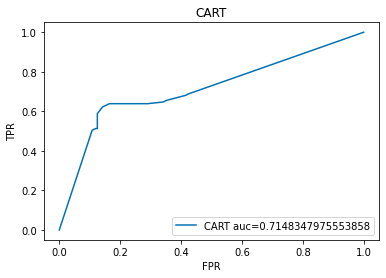

In [338]:
y_pred_proba1 = DecisionTreeClassifier(criterion = "gini").fit(X_dt, y_dt).predict_proba(X_dt_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(yyy,  y_pred_proba1)
auc1 = metrics.roc_auc_score(yyy, y_pred_proba1)
plt.plot(fpr1,tpr1,label="CART auc="+str(auc1))
plt.legend(loc=4)
plt.title('CART')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

###RF ROC

In [339]:
print("Accuracy", metrics.accuracy_score(yyy, pred_rf_test))

Accuracy 0.7559322033898305


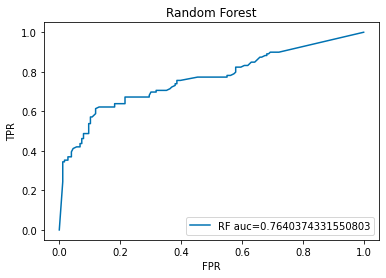

In [340]:
y_pred_proba2 = RandomForestClassifier(n_estimators = 100, criterion = "gini").fit(X_dt, rfy_dt).predict_proba(X_dt_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(yyy,  y_pred_proba2)
auc2 = metrics.roc_auc_score(yyy, y_pred_proba2)
plt.plot(fpr2,tpr2,label="RF auc="+str(auc2))
plt.legend(loc=4)
plt.title('Random Forest')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

###NB ROC

In [341]:
print("Accuracy", metrics.accuracy_score(yyy, yprednb2))

Accuracy 0.7966101694915254


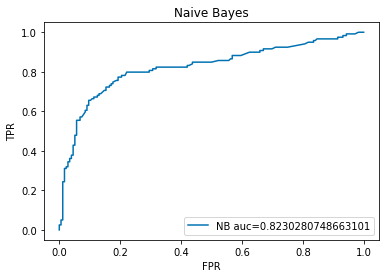

In [342]:
y_pred_proba = MultinomialNB().fit(xnb, ynb).predict_proba(xnbtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(yyy,  y_pred_proba)
auc = metrics.roc_auc_score(yyy, y_pred_proba)
plt.plot(fpr,tpr,label="NB auc="+str(auc))
plt.legend(loc=4)
plt.title('Naive Bayes')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

#fpr, tpr, _ = metrics.roc_curve(yyy,  y_pred_proba)
#plt.plot(fpr, tpr)
#plt.show()

### Logistic Regression ROC

In [344]:
print("Accuracy", metrics.accuracy_score(yyy, ypred_logis))

Accuracy 0.7864406779661017


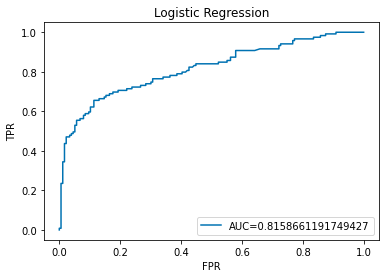

In [343]:
#create ROC curve for Logistic regression model
lg_pred_prob = logreg01.predict(X_logi_d_test)
fpr9, tpr9, _ = metrics.roc_curve(yyy,  lg_pred_prob)
auc9 = metrics.roc_auc_score(yyy, lg_pred_prob)
plt.plot(fpr9,tpr9,label="AUC="+str(auc9))
plt.legend(loc=4)
plt.title('Logistic Regression')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()